**1. Understand the Problem**

* Familiarize yourself with degenerative spine conditions and how they are diagnosed using MRI.

*  Review the competition details, including the evaluation metrics and submission format.

**1.Project Setup and Data Loading**

** Objective**: To classify lumbar spine degenerative conditions using medical images.

Data Source: You have a dataset containing medical images stored in a folder structure and corresponding labels in a CSV file.

**Key Files:**
train_images: Folder containing DICOM images of lumbar spine scans.

train_label_coordinates.csv: CSV file containing labels for each image, including study IDs, series IDs, and specific conditions.

2. Data Preprocessing
Reading Labels: You loaded the labels from the CSV file into a Pandas DataFrame using pd.read_csv(). This CSV contained columns like study_id, series_id, condition, etc.
Iterating Over Images: You wrote a loop to iterate through the folder structure (organized by study ID and series ID) to load images using the pydicom library.
Label Extraction: For each image, you matched the corresponding label from the DataFrame based on study_id and series_id. If no label was found, you assigned a default value.

3. Image Processing

Data Augmentation: You used the ImageDataGenerator from Keras to apply data augmentation techniques like rotation, shifting, shearing, and zooming to artificially expand the dataset and improve model generalization.
Image Preparation: After loading, you converted images into NumPy arrays for easier manipulation and feeding into the neural network.

4. Model Architecture
Convolutional Neural Network (CNN):
Layers:
Conv2D Layers: Extract spatial features from the images using convolution operations.
MaxPooling2D Layers: Downsample the image to reduce computational complexity.
Flatten Layer: Converts the 2D matrices to a 1D vector to feed into fully connected layers.
Dense Layers: Fully connected layers to perform classification.
Dropout Layer: Regularization technique to prevent overfitting by randomly setting a fraction of input units to 0.
Output Layer: A softmax layer to predict one of the three classes (Normal/Mild, Moderate, Severe).
Compilation: You compiled the model using the Adam optimizer and sparse_categorical_crossentropy loss function, which is suitable for multi-class classification.

5. Model Training
Training the Model:
You trained the model on the augmented image data using the fit() method.
Validation: During training, you monitored the model's performance on a validation set to prevent overfitting and adjust hyperparameters if necessary.

6. Model Evaluation

Once training is complete, you will evaluate the model using the validation set to assess its performance. This typically involves checking metrics like accuracy and loss, as well as visualizing the results with plots.

7. Summary

Goal: The primary goal is to classify images of lumbar spine conditions into different severity levels using a deep learning model.

Process:
Data Loading: Load and preprocess image data and corresponding labels.
Image Processing: Apply techniques like data augmentation to enhance model performance.
Model Design: Design a CNN model tailored for image classification tasks.
Training: Train the model on augmented data and monitor its performance on a validation set.
Evaluation (Next Step): Assess the model's accuracy and loss, and fine-tune if necessary.
This workflow provides a clear and concise overview of your work, from the initial setup to the upcoming steps in model evaluation.

**1. Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import os
import pydicom
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [52]:
import os
base_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification'
train_desc_path = os.path.join(base_path,'train_series_descriptions.csv')
train_label_path = os.path.join(base_path,'train_label_coordinates.csv')
train_csv_path = os.path.join(base_path,'train.csv')
train_folder = os.path.join(base_path,'train_images')
test_folder = os.path.join(base_path,'test_images')

**2. Load Data**

In [46]:
# Define the paths to the directories and files
train_images_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'
train_csv_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv'
train_label_coordinates_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv'
train_series_descriptions_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_series_descriptions.csv'


In [56]:
import pandas as pd

train_desc = pd.read_csv(train_desc_path)
train_label = pd.read_csv(train_label_path)
train = pd.read_csv(train_csv_path)

In [57]:
train_desc.head()

study_id   series_id series_description
0   4003253   702807833   Sagittal T2/STIR
1   4003253  1054713880        Sagittal T1
2   4003253  2448190387           Axial T2
3   4646740  3201256954           Axial T2
4   4646740  3486248476        Sagittal T1

In [58]:
train_desc.tail()

study_id   series_id series_description
6289  4287160193  1507070277   Sagittal T2/STIR
6290  4287160193  1820446240           Axial T2
6291  4290709089  3274612423   Sagittal T2/STIR
6292  4290709089  3390218084           Axial T2
6293  4290709089  4237840455        Sagittal T1

In [59]:
train_label

study_id   series_id  instance_number  \
0         4003253   702807833                8   
1         4003253   702807833                8   
2         4003253   702807833                8   
3         4003253   702807833                8   
4         4003253   702807833                8   
...           ...         ...              ...   
48687  4290709089  4237840455               11   
48688  4290709089  4237840455               12   
48689  4290709089  4237840455               12   
48690  4290709089  4237840455               12   
48691  4290709089  4237840455               12   

                             condition  level           x           y  
0                Spinal Canal Stenosis  L1/L2  322.831858  227.964602  
1                Spinal Canal Stenosis  L2/L3  320.571429  295.714286  
2                Spinal Canal Stenosis  L3/L4  323.030303  371.818182  
3                Spinal Canal Stenosis  L4/L5  335.292035  427.327434  
4                Spinal Canal Stenosis  L5/S1  353.415929  483.964602  
...                                ...    ...         ...         ...  
48687  Left Neural Foraminal Narrowing  L1/L2  219.465940   97.831063  
48688  Left Neural Foraminal Narrowing  L2/L3  205.340599  140.207084  
48689  Left Neural Foraminal Narrowing  L3/L4  202.724796  181.013624  
48690  Left Neural Foraminal Narrowing  L4/L5  202.933333  219.733333  
48691  Left Neural Foraminal Narrowing  L5/S1  211.813953  259.534884  

[48692 rows x 7 columns]

In [60]:
train.head()

study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3  \
0   4003253                 Normal/Mild                 Normal/Mild   
1   4646740                 Normal/Mild                 Normal/Mild   
2   7143189                 Normal/Mild                 Normal/Mild   
3   8785691                 Normal/Mild                 Normal/Mild   
4  10728036                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5  \
0                 Normal/Mild                 Normal/Mild   
1                    Moderate                      Severe   
2                 Normal/Mild                 Normal/Mild   
3                 Normal/Mild                 Normal/Mild   
4                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2  \
0                 Normal/Mild                           Normal/Mild   
1                 Normal/Mild                           Normal/Mild   
2                 Normal/Mild                           Normal/Mild   
3                 Normal/Mild                           Normal/Mild   
4                 Normal/Mild                           Normal/Mild   

  left_neural_foraminal_narrowing_l2_l3 left_neural_foraminal_narrowing_l3_l4  \
0                           Normal/Mild                           Normal/Mild   
1                           Normal/Mild                           Normal/Mild   
2                           Normal/Mild                           Normal/Mild   
3                           Normal/Mild                           Normal/Mild   
4                           Normal/Mild                           Normal/Mild   

  left_neural_foraminal_narrowing_l4_l5  ... left_subarticular_stenosis_l1_l2  \
0                              Moderate  ...                      Normal/Mild   
1                              Moderate  ...                      Normal/Mild   
2                           Normal/Mild  ...                      Normal/Mild   
3                              Moderate  ...                      Normal/Mild   
4                           Normal/Mild  ...                      Normal/Mild   

  left_subarticular_stenosis_l2_l3 left_subarticular_stenosis_l3_l4  \
0                      Normal/Mild                      Normal/Mild   
1                      Normal/Mild                      Normal/Mild   
2                      Normal/Mild                      Normal/Mild   
3                      Normal/Mild                      Normal/Mild   
4                      Normal/Mild                      Normal/Mild   

  left_subarticular_stenosis_l4_l5 left_subarticular_stenosis_l5_s1  \
0                         Moderate                      Normal/Mild   
1                           Severe                      Normal/Mild   
2                      Normal/Mild                      Normal/Mild   
3                      Normal/Mild                      Normal/Mild   
4                      Normal/Mild                      Normal/Mild   

  right_subarticular_stenosis_l1_l2 right_subarticular_stenosis_l2_l3  \
0                       Normal/Mild                       Normal/Mild   
1                       Normal/Mild                          Moderate   
2                       Normal/Mild                       Normal/Mild   
3                       Normal/Mild                       Normal/Mild   
4                       Normal/Mild                       Normal/Mild   

  right_subarticular_stenosis_l3_l4 right_subarticular_stenosis_l4_l5  \
0                       Normal/Mild                       Normal/Mild   
1                          Moderate                          Moderate   
2                       Normal/Mild                       Normal/Mild   
3                       Normal/Mild                       Normal/Mild   
4                       Normal/Mild                          Moderate   

  right_subarticular_stenosis_l5_s1  
0                       Normal/Mild  


In [61]:
train_data = pd.merge(train_label, train_desc, on = ['study_id', 'series_id'], how = 'inner')

In [62]:
train_data

study_id   series_id  instance_number  \
0         4003253   702807833                8   
1         4003253   702807833                8   
2         4003253   702807833                8   
3         4003253   702807833                8   
4         4003253   702807833                8   
...           ...         ...              ...   
48687  4290709089  4237840455               11   
48688  4290709089  4237840455               12   
48689  4290709089  4237840455               12   
48690  4290709089  4237840455               12   
48691  4290709089  4237840455               12   

                             condition  level           x           y  \
0                Spinal Canal Stenosis  L1/L2  322.831858  227.964602   
1                Spinal Canal Stenosis  L2/L3  320.571429  295.714286   
2                Spinal Canal Stenosis  L3/L4  323.030303  371.818182   
3                Spinal Canal Stenosis  L4/L5  335.292035  427.327434   
4                Spinal Canal Stenosis  L5/S1  353.415929  483.964602   
...                                ...    ...         ...         ...   
48687  Left Neural Foraminal Narrowing  L1/L2  219.465940   97.831063   
48688  Left Neural Foraminal Narrowing  L2/L3  205.340599  140.207084   
48689  Left Neural Foraminal Narrowing  L3/L4  202.724796  181.013624   
48690  Left Neural Foraminal Narrowing  L4/L5  202.933333  219.733333   
48691  Left Neural Foraminal Narrowing  L5/S1  211.813953  259.534884   

      series_description  
0       Sagittal T2/STIR  
1       Sagittal T2/STIR  
2       Sagittal T2/STIR  
3       Sagittal T2/STIR  
4       Sagittal T2/STIR  
...                  ...  
48687        Sagittal T1  
48688        Sagittal T1  
48689        Sagittal T1  
48690        Sagittal T1  
48691        Sagittal T1  

[48692 rows x 8 columns]

In [3]:
# Load training labels
train_labels = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv')
train_label_coords = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv')

# Display the first few rows
print(train_labels.head())
print(train_label_coords.head())

   study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3  \
0   4003253                 Normal/Mild                 Normal/Mild   
1   4646740                 Normal/Mild                 Normal/Mild   
2   7143189                 Normal/Mild                 Normal/Mild   
3   8785691                 Normal/Mild                 Normal/Mild   
4  10728036                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5  \
0                 Normal/Mild                 Normal/Mild   
1                    Moderate                      Severe   
2                 Normal/Mild                 Normal/Mild   
3                 Normal/Mild                 Normal/Mild   
4                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2  \
0                 Normal/Mild                           Normal/Mild   
1                 Normal/Mild                           Normal/M

In [5]:
# Check the structure of the training dataset
print(train_df.info())
print(train_df.describe())

# Check for missing values
print(train_df.isnull().sum())

# Do the same for label coordinates
print(label_coords_df.info())
print(label_coords_df.describe())
print(label_coords_df.isnull().sum())

# And for series descriptions
print(train_series_desc_df.info())
print(train_series_desc_df.describe())
print(train_series_desc_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null   object
 11  righ

****3. Image Preprocessing****

In [6]:
# List the directories inside the train_images folder
train_images_dir = os.path.join(data_dir, 'train_images')
studies = os.listdir(train_images_dir)

# Print the first few study IDs
print("Available study IDs:", studies[:5])

# Now, list the series within a study
sample_study_dir = os.path.join(train_images_dir, studies[0])
series = os.listdir(sample_study_dir)

print("Available series in the first study:", series)

# List the DICOM files in the first series
sample_series_dir = os.path.join(sample_study_dir, series[0])
dicom_files = os.listdir(sample_series_dir)

print("Available DICOM files in the first series:", dicom_files[:5])


Available study IDs: ['1737682527', '1972129014', '2676098721', '1176954132', '3004806533']
Available series in the first study: ['2291122880', '1510698437', '1258728011']
Available DICOM files in the first series: ['12.dcm', '18.dcm', '9.dcm', '14.dcm', '11.dcm']


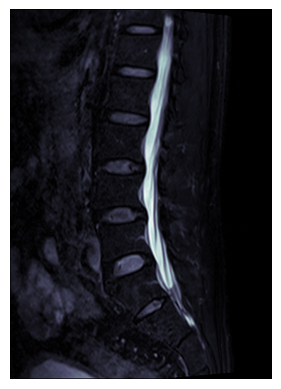

In [9]:
# Define the path to a sample DICOM image
sample_image_path = os.path.join(sample_series_dir, dicom_files[0])

# Load the DICOM file
dicom_image = pydicom.dcmread(sample_image_path)

# Display the image using matplotlib
plt.imshow(dicom_image.pixel_array, cmap=plt.cm.bone)
plt.axis('off')  # Hide the axis
plt.show()


In [25]:
import pandas as pd

# Load training labels
train_labels = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv')

# Print the first few rows and columns for debugging
print(train_labels.columns)


Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

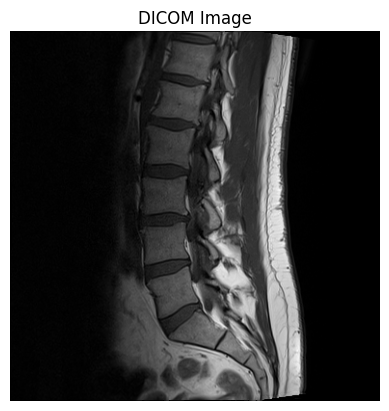

In [29]:
import pydicom
import matplotlib.pyplot as plt

# Path to the specific DICOM file
file_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/1012375618/352098527/7.dcm'

# Load the DICOM file
try:
    dicom_img = pydicom.dcmread(file_path)
    
    # Extract pixel data
    img = dicom_img.pixel_array
    
    # Display the image
    plt.imshow(img, cmap='gray')  # Use 'gray' colormap for DICOM images
    plt.title('DICOM Image')
    plt.axis('off')  # Hide axis
    plt.show()

except Exception as e:
    print(f"Error loading DICOM file: {e}")


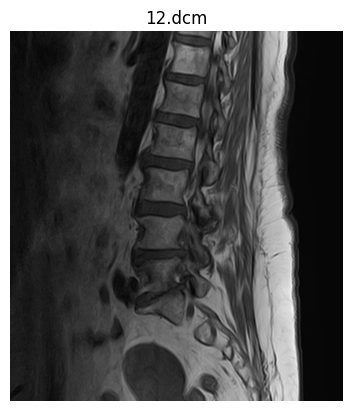

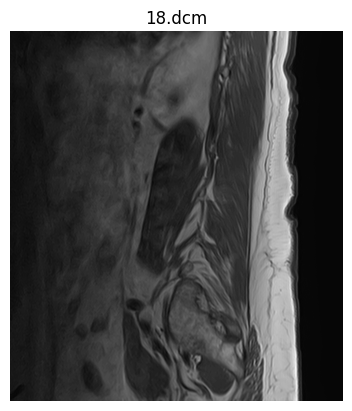

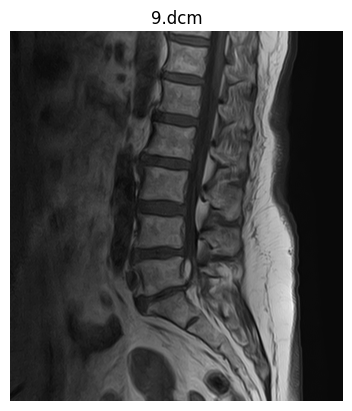

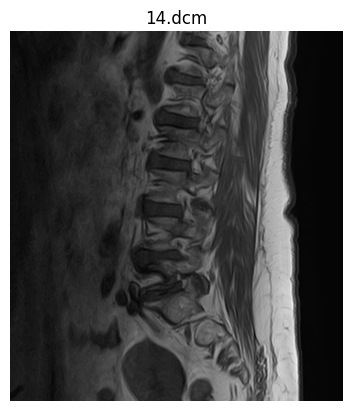

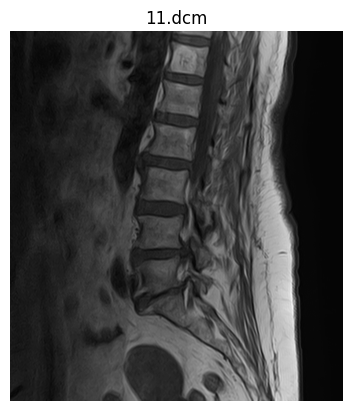

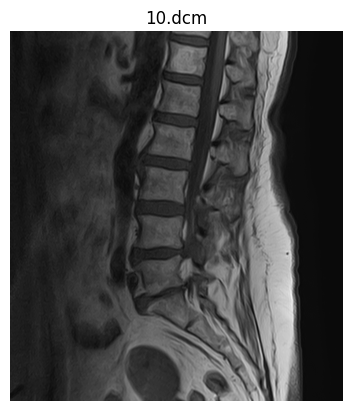

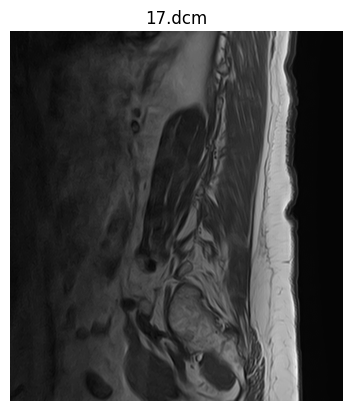

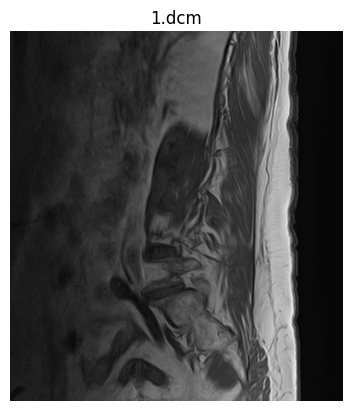

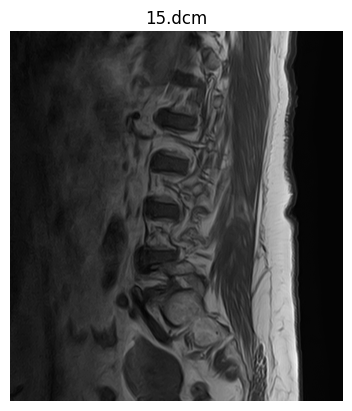

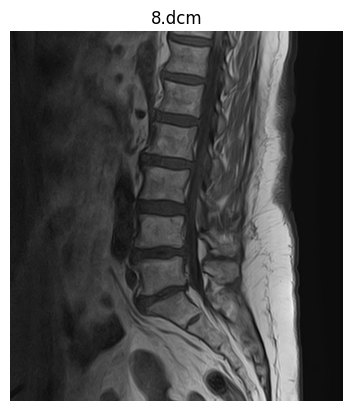

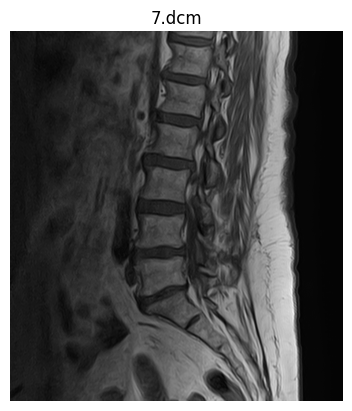

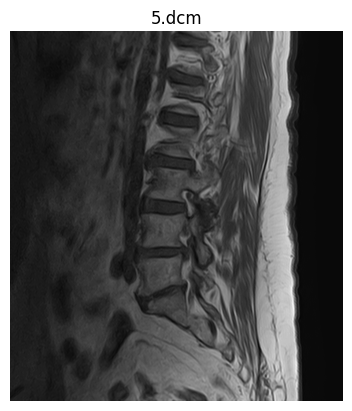

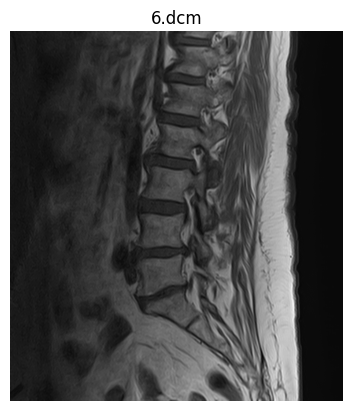

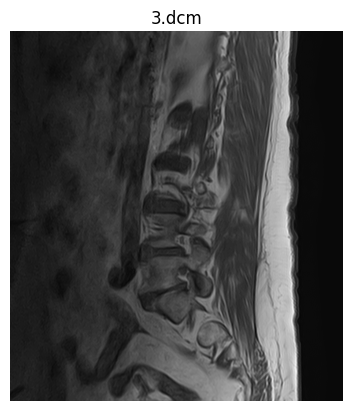

In [30]:
import os
import pydicom
import matplotlib.pyplot as plt

# Path to the folder containing DICOM files
folder_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/1020394063/1523561649'

# Get all DICOM files in the folder
dicom_files = [f for f in os.listdir(folder_path) if f.endswith('.dcm')]

# Load and display each DICOM file
for dicom_file in dicom_files:
    file_path = os.path.join(folder_path, dicom_file)
    
    try:
        # Load the DICOM file
        dicom_img = pydicom.dcmread(file_path)
        
        # Extract pixel data
        img = dicom_img.pixel_array
        
        # Display the image
        plt.imshow(img, cmap='gray')  # Use 'gray' colormap for DICOM images
        plt.title(dicom_file)  # Display the filename as the title
        plt.axis('off')  # Hide axis
        plt.show()
        
    except Exception as e:
        print(f"Error loading DICOM file {dicom_file}: {e}")


In [63]:
train_folder

'/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

In [67]:
train_data['image_path'] = train_folder + '/' + train_data.study_id.astype(str) + '/' + train_data.series_id.astype(str) + '/' + train_data.instance_number.astype(str) + '.dcm'

In [69]:
train_data.head()

study_id  series_id  instance_number              condition  level  \
0   4003253  702807833                8  Spinal Canal Stenosis  L1/L2   
1   4003253  702807833                8  Spinal Canal Stenosis  L2/L3   
2   4003253  702807833                8  Spinal Canal Stenosis  L3/L4   
3   4003253  702807833                8  Spinal Canal Stenosis  L4/L5   
4   4003253  702807833                8  Spinal Canal Stenosis  L5/S1   

            x           y series_description  \
0  322.831858  227.964602   Sagittal T2/STIR   
1  320.571429  295.714286   Sagittal T2/STIR   
2  323.030303  371.818182   Sagittal T2/STIR   
3  335.292035  427.327434   Sagittal T2/STIR   
4  353.415929  483.964602   Sagittal T2/STIR   

                                          image_path  
0  /kaggle/input/rsna-2024-lumbar-spine-degenerat...  
1  /kaggle/input/rsna-2024-lumbar-spine-degenerat...  
2  /kaggle/input/rsna-2024-lumbar-spine-degenerat...  
3  /kaggle/input/rsna-2024-lumbar-spine-degenerat...  
4  /kaggle/input/rsna-2024-lumbar-spine-degenerat...

In [75]:
train_data.columns

Index(['study_id', 'series_id', 'instance_number', 'condition', 'level', 'x',
       'y', 'series_description', 'image_path'],
      dtype='object')

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48692 entries, 0 to 48691
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   study_id            48692 non-null  int64  
 1   series_id           48692 non-null  int64  
 2   instance_number     48692 non-null  int64  
 3   condition           48692 non-null  object 
 4   level               48692 non-null  object 
 5   x                   48692 non-null  float64
 6   y                   48692 non-null  float64
 7   series_description  48692 non-null  object 
 8   image_path          48692 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.3+ MB


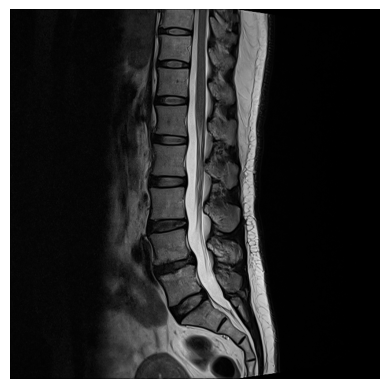

In [71]:
import os
import pydicom
import matplotlib.pyplot as plt

# Assuming you have already set the train_folder variable correctly
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

def display_image(study_id, series_id, instance_number):
    # Construct the file path
    file_path = os.path.join(train_folder, study_id, series_id, f'{instance_number + 1}.dcm')  # +1 to start from 1
    # Check if the file exists
    if os.path.exists(file_path):
        dicom_image = pydicom.dcmread(file_path).pixel_array
        plt.imshow(dicom_image, cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        print(f'File not found: {file_path}')

# Update this call with actual values from your dataset
display_image('4003253', '702807833', 7)  # Change 7 to the actual instance number you want to display


In [72]:
study_id = '4003253'
series_id = '702807833'
series_path = os.path.join(train_folder, study_id, series_id)
print(os.listdir(series_path))  # This will list all the DICOM files in the specified series


['12.dcm', '9.dcm', '14.dcm', '11.dcm', '10.dcm', '1.dcm', '15.dcm', '2.dcm', '8.dcm', '7.dcm', '5.dcm', '4.dcm', '6.dcm', '3.dcm', '13.dcm']


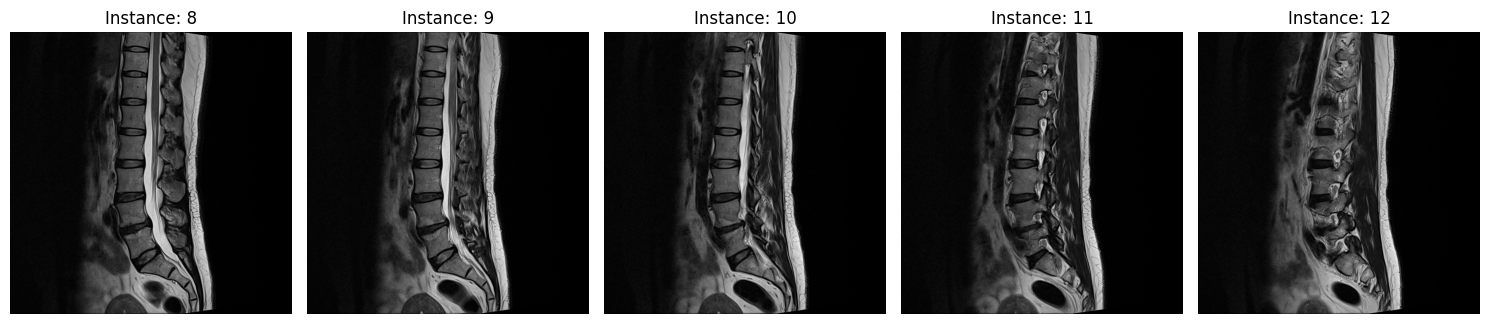

In [73]:
import os
import pydicom
import matplotlib.pyplot as plt

# Assuming you have already set the train_folder variable correctly
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

def display_images(study_id, series_id, instance_numbers):
    plt.figure(figsize=(15, 10))  # Set the figure size for better visualization
    for i, instance_number in enumerate(instance_numbers):
        # Construct the file path (add 1 if the instance_number starts from 0)
        file_path = os.path.join(train_folder, study_id, series_id, f'{instance_number + 1}.dcm')
        # Check if the file exists
        if os.path.exists(file_path):
            dicom_image = pydicom.dcmread(file_path).pixel_array
            plt.subplot(1, len(instance_numbers), i + 1)  # Create subplots
            plt.imshow(dicom_image, cmap='gray')
            plt.axis('off')
            plt.title(f'Instance: {instance_number + 1}')  # Title for each image
        else:
            print(f'File not found: {file_path}')
    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

# Update this call with actual values from your dataset
study_id = '4003253'
series_id = '702807833'
instance_numbers = [7, 8, 9, 10, 11]  # Replace with the actual instance numbers you want to display
display_images(study_id, series_id, instance_numbers)


In [92]:
import os

# Path to the train_images folder
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

# List all study IDs (folders) in the train folder
study_ids = os.listdir(train_folder)
print("Available Study IDs:", study_ids)

# Pick a study ID and list all series IDs (folders)
series_ids = os.listdir(os.path.join(train_folder, study_ids[0]))
print(f"Available Series IDs for {study_ids[0]}:", series_ids)

# Pick a series ID and list all instance files
instance_files = os.listdir(os.path.join(train_folder, study_ids[0], series_ids[0]))
print(f"Available Instance Files for {study_ids[0]}/{series_ids[0]}:", instance_files)



Available Study IDs: ['1737682527', '1972129014', '2676098721', '1176954132', '3004806533', '1891482189', '3429409220', '341051344', '1178209527', '114899184', '2532413137', '4031357862', '3731783147', '4115208111', '3588716120', '2608235425', '1020394063', '3563559233', '2563313484', '82066307', '829439070', '2864325627', '108348787', '1153238977', '1719776527', '2697637622', '177339056', '3573227658', '2925530521', '106310815', '2493610993', '2121891805', '1661682358', '1768692511', '1908143210', '247968996', '2584853409', '2851207875', '1782095928', '2387323642', '2718854859', '3367650254', '3537214277', '1165361924', '390498354', '3311528906', '2155667219', '2026420722', '3151371929', '2605844245', '2406108213', '2324297179', '1722993663', '3318343342', '2247118504', '3426183113', '1292979992', '2241283141', '377474930', '4283570761', '3889130987', '1722308532', '2287443993', '1094879459', '1013589491', '3976403280', '2988180557', '3237383375', '2034823515', '1057173941', '40756038

**. Visualizing a DICOM Image**

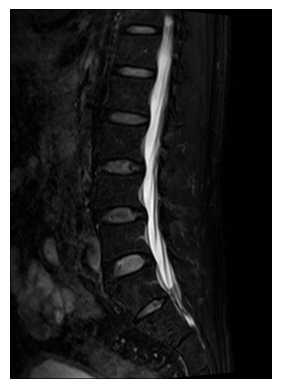

In [93]:
import pydicom
import matplotlib.pyplot as plt

def display_image(study_id, series_id, instance_number):
    file_path = os.path.join(train_folder, study_id, series_id, f'{instance_number}.dcm')
    dicom_image = pydicom.dcmread(file_path).pixel_array
    plt.imshow(dicom_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Example: Replace with actual study_id, series_id, and instance_number
display_image(study_ids[0], series_ids[0], instance_files[0].split('.')[0])


**Automate Random Selection for Visualization**

To visualize a random image from the dataset:

In [94]:
import random

# Randomly select a study ID, series ID, and instance file
random_study = random.choice(study_ids)
random_series = random.choice(os.listdir(os.path.join(train_folder, random_study)))
random_instance = random.choice(os.listdir(os.path.join(train_folder, random_study, random_series)))

# Display the randomly selected image
display_image(random_study, random_series, random_instance.split('.')[0])


Selected 18 images for visualization.


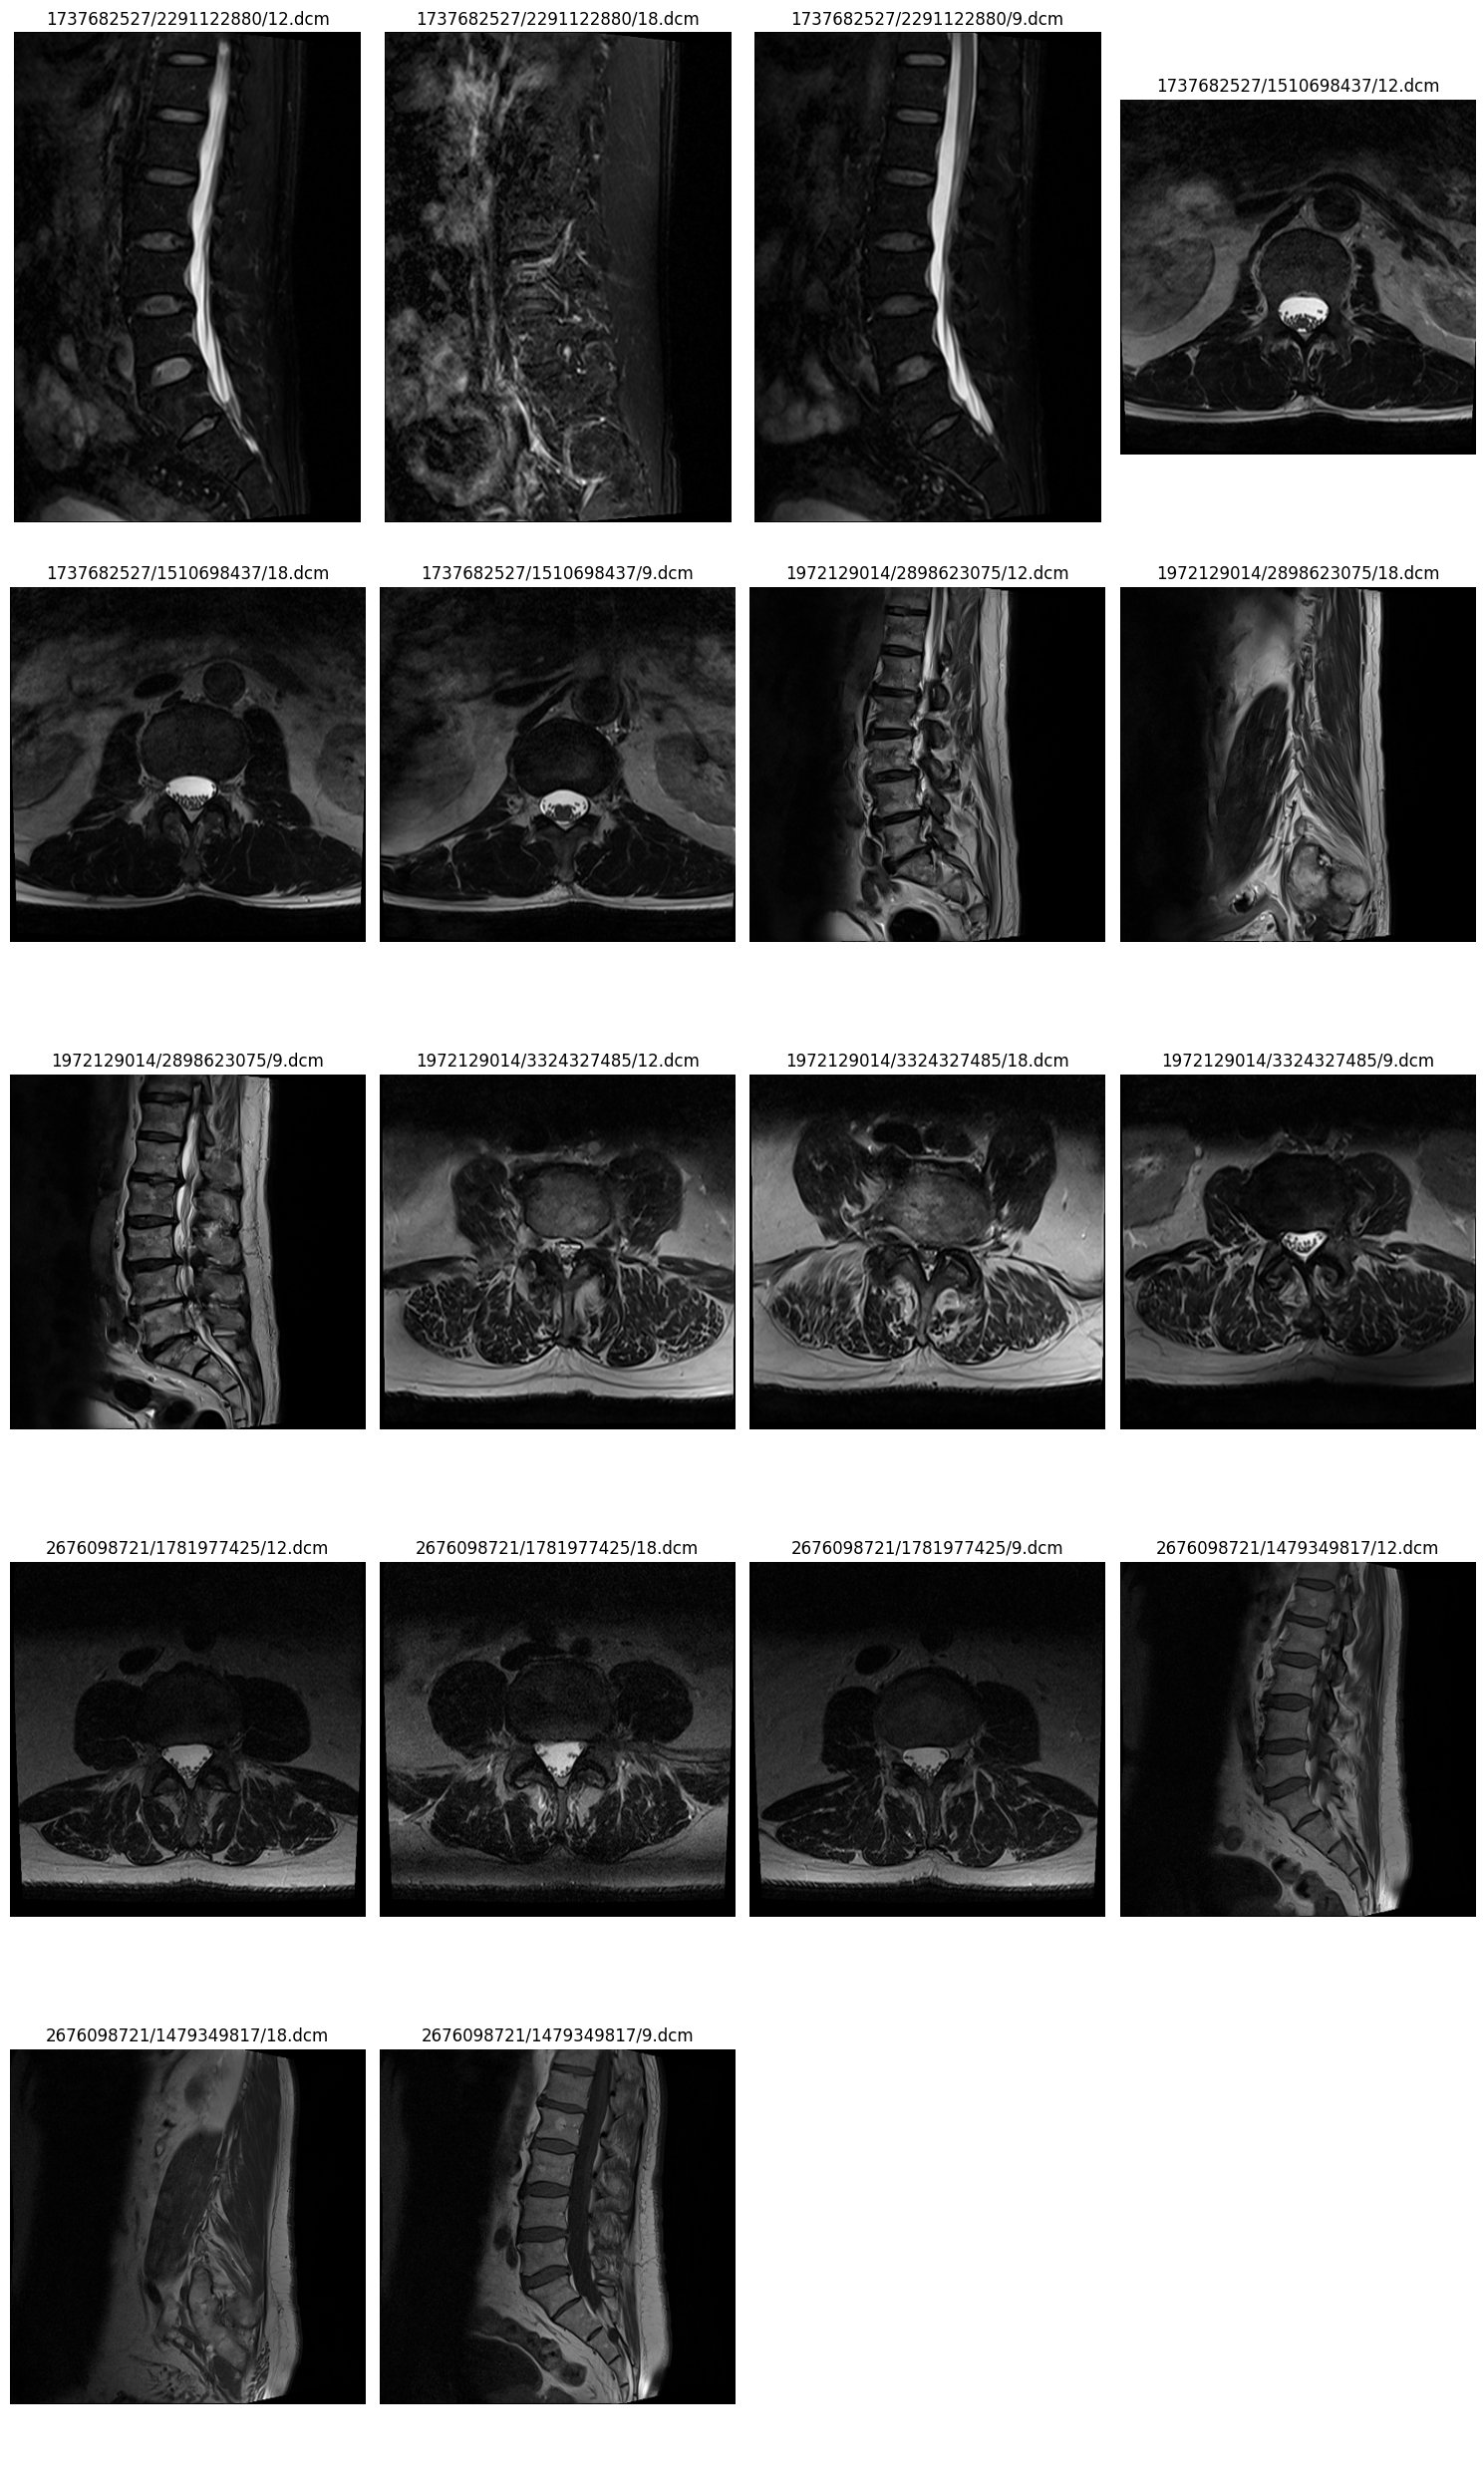

In [99]:
import os
import pydicom
import matplotlib.pyplot as plt

# Path to the train_images folder
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

# Function to display multiple DICOM images
def display_images(image_arrays, titles, ncols=4):
    nrows = len(image_arrays) // ncols + (1 if len(image_arrays) % ncols else 0)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    
    for i, (image, title) in enumerate(zip(image_arrays, titles)):
        ax = axes.flat[i]
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    
    # Hide any remaining subplots if there are empty spots
    for i in range(len(image_arrays), nrows * ncols):
        axes.flat[i].axis('off')

    plt.tight_layout()
    plt.show()

# Select a few study IDs to visualize
selected_studies = study_ids[:3]  # Adjust the number based on your need

image_arrays = []
titles = []

# Iterate through selected studies and series to collect images
for study_id in selected_studies:
    study_path = os.path.join(train_folder, study_id)
    series_ids = os.listdir(study_path)
    
    for series_id in series_ids[:2]:  # Adjust the number based on your need
        series_path = os.path.join(study_path, series_id)
        instance_files = os.listdir(series_path)
        
        for instance_file in instance_files[:3]:  # Adjust the number based on your need
            dicom_path = os.path.join(series_path, instance_file)
            dicom_data = pydicom.dcmread(dicom_path)
            image_arrays.append(dicom_data.pixel_array)
            titles.append(f'{study_id}/{series_id}/{instance_file}')
        
print(f"Selected {len(image_arrays)} images for visualization.")

# Display the selected images
display_images(image_arrays, titles)


**Key Regions Highlighted: Enhancing Spinal Degeneration Visualization**

In [100]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


**Highlight Areas in the Image**

In [101]:
import os
import pydicom
import cv2
import matplotlib.pyplot as plt

# Path to the train_images folder
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

# Function to display images with highlighted regions
def highlight_region(image, points, color=(255, 0, 0), thickness=2):
    """
    Draw rectangles around the points of interest in the image.
    
    Args:
        image: The original image array.
        points: List of top-left and bottom-right points for rectangles.
        color: Color of the rectangle in BGR format.
        thickness: Thickness of the rectangle border.
        
    Returns:
        Image with rectangles drawn.
    """
    for (x, y, w, h) in points:
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
    return image

# Select a study and series
selected_study = study_ids[0]
selected_series = os.listdir(os.path.join(train_folder, selected_study))[0]

# Path to DICOM files
dicom_files = os.listdir(os.path.join(train_folder, selected_study, selected_series))

# Load a DICOM file and convert it to an OpenCV image
dicom_path = os.path.join(train_folder, selected_study, selected_series, dicom_files[0])
dicom_data = pydicom.dcmread(dicom_path)
image = dicom_data.pixel_array

# Convert the image to 8-bit format (if necessary) for OpenCV
image_8bit = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))

# Define the regions of interest (ROI) manually or through a model (x, y, width, height)
# Example: Highlighting a small portion at the center of the image
roi = [(150, 200, 50, 50), (300, 400, 100, 100)]  # Example points

# Highlight the region
highlighted_image = highlight_region(image_8bit, roi, color=(0, 255, 0), thickness=3)

# Display the image with highlighted regions
plt.figure(figsize=(10, 10))
plt.imshow(highlighted_image, cmap='gray')
plt.axis('off')
plt.title('Highlighted Spine Regions')
plt.show()


Available Study IDs: ['1737682527', '1972129014', '2676098721', '1176954132', '3004806533', '1891482189', '3429409220', '341051344', '1178209527', '114899184', '2532413137', '4031357862', '3731783147', '4115208111', '3588716120', '2608235425', '1020394063', '3563559233', '2563313484', '82066307', '829439070', '2864325627', '108348787', '1153238977', '1719776527', '2697637622', '177339056', '3573227658', '2925530521', '106310815', '2493610993', '2121891805', '1661682358', '1768692511', '1908143210', '247968996', '2584853409', '2851207875', '1782095928', '2387323642', '2718854859', '3367650254', '3537214277', '1165361924', '390498354', '3311528906', '2155667219', '2026420722', '3151371929', '2605844245', '2406108213', '2324297179', '1722993663', '3318343342', '2247118504', '3426183113', '1292979992', '2241283141', '377474930', '4283570761', '3889130987', '1722308532', '2287443993', '1094879459', '1013589491', '3976403280', '2988180557', '3237383375', '2034823515', '1057173941', '40756038

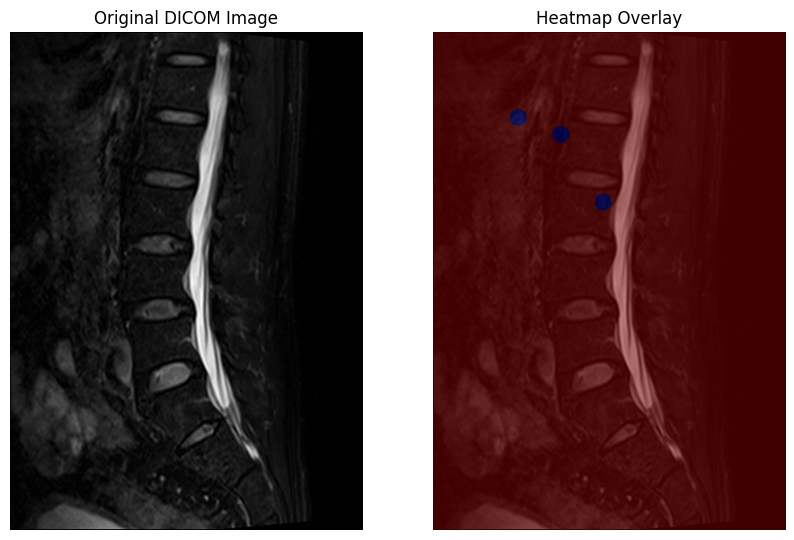

In [105]:
import os
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt

# Path to the train_images folder
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

# Step 1: List available Study IDs
study_ids = os.listdir(train_folder)
print("Available Study IDs:", study_ids)

# Pick the first study ID for demonstration (you can change this as needed)
study_id = study_ids[0]

# Step 2: List available Series IDs for the chosen Study ID
series_ids = os.listdir(os.path.join(train_folder, study_id))
print(f"Available Series IDs for {study_id}:", series_ids)

# Pick the first series ID for demonstration
series_id = series_ids[0]

# Step 3: List available Instance Files for the chosen Series ID
instance_files = os.listdir(os.path.join(train_folder, study_id, series_id))
print(f"Available Instance Files for {study_id}/{series_id}:", instance_files)

# Pick the first instance file for demonstration
instance_number = instance_files[0]  # e.g., '1.dcm'

# Function to create a heatmap overlay on the DICOM image
def create_heatmap(image, critical_points, intensity=255):
    heatmap = np.zeros_like(image, dtype=np.float32)
    
    for point in critical_points:
        # Increase heatmap intensity at the critical points
        cv2.circle(heatmap, point, radius=10, color=intensity, thickness=-1)
    
    # Normalize the heatmap to be between 0 and 1
    heatmap = cv2.normalize(heatmap, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    
    # Convert heatmap to color (e.g., using a colormap)
    heatmap_color = cv2.applyColorMap(np.uint8(heatmap * 255), cv2.COLORMAP_JET)
    
    # Ensure the original image is 3 channels
    if len(image.shape) == 2:  # If the image is grayscale
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Overlay the heatmap on the original image
    overlay = cv2.addWeighted(image, 0.5, heatmap_color, 0.5, 0)
    
    return overlay

# Load the DICOM image
file_path = os.path.join(train_folder, study_id, series_id, instance_number)
dicom_data = pydicom.dcmread(file_path)
dicom_image = dicom_data.pixel_array

# If the image is 2D, make sure it's in the correct format (e.g., uint8)
if dicom_image.dtype != np.uint8:
    dicom_image = (dicom_image / dicom_image.max() * 255).astype(np.uint8)

# Define critical points (for demonstration, let's assume some random points)
# In a real scenario, these would come from an analysis or model output
critical_points = [(100, 100), (150, 120), (200, 200)]  # Replace with actual points

# Create the heatmap overlay
heatmap_overlay = create_heatmap(dicom_image, critical_points)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original DICOM Image')
plt.imshow(dicom_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Heatmap Overlay')
plt.imshow(heatmap_overlay)
plt.axis('off')

plt.show()



**Steps for 3D Reconstruction of Spine**

**Load the DICOM Series:**
Load the series of DICOM images that represent cross-sections of the spine.

* Stack the Images:
Stack the 2D images into a 3D NumPy array, where each slice corresponds to a DICOM image.

* Create a Volume Rendering:
Use a volume rendering technique to visualize the 3D structure.

* Surface Reconstruction (Optional):
If you need to create a mesh from the volume, you can use techniques like Marching Cubes or similar algorithms available in libraries like skimage.

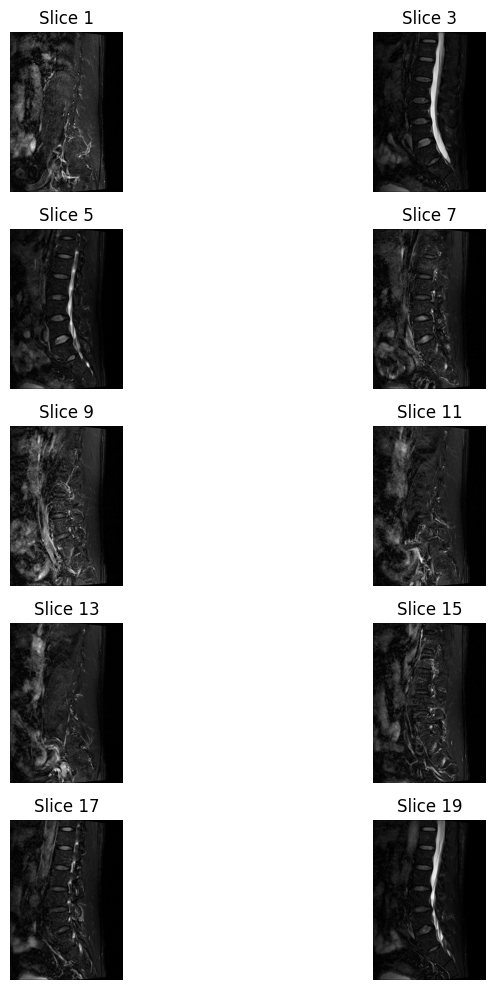

In [106]:
import os
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to the train_images folder
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

# Step 1: List available Study IDs
study_ids = os.listdir(train_folder)
study_id = study_ids[0]  # Choose the first study ID for demonstration

# Step 2: List available Series IDs
series_ids = os.listdir(os.path.join(train_folder, study_id))
series_id = series_ids[0]  # Choose the first series ID for demonstration

# Step 3: List available Instance Files
instance_files = sorted(os.listdir(os.path.join(train_folder, study_id, series_id)))
dicom_images = []

# Step 4: Load DICOM images into a 3D array
for instance in instance_files:
    file_path = os.path.join(train_folder, study_id, series_id, instance)
    dicom_data = pydicom.dcmread(file_path)
    dicom_image = dicom_data.pixel_array
    
    # Normalize the image to 0-255 for better visualization
    dicom_image = (dicom_image / np.max(dicom_image) * 255).astype(np.uint8)
    
    dicom_images.append(dicom_image)

# Stack images to create a 3D volume
volume = np.stack(dicom_images, axis=-1)

# Step 5: Visualize a few slices of the 3D volume
fig = plt.figure(figsize=(10, 10))
num_slices = len(dicom_images)
for i in range(0, num_slices, num_slices // 10):  # Show 10 slices
    ax = fig.add_subplot(5, 2, i // (num_slices // 10) + 1)
    ax.imshow(volume[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Slice {i + 1}')
plt.tight_layout()
plt.show()

# Step 6: 3D Visualization (optional)
# Create a grid of points for the 3D volume
x, y, z = np.indices(volume.shape)

# Create a mask for non-zero voxels
mask = volume > 0

# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[mask], y[mask], z[mask], c='r', s=1)  # Use red points for the volume

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Reconstruction of Spine')
plt.show()


**Summary Report for Lumbar Spine Degenerative Classification Project**

The goal of this project is to classify lumbar spine images based on degeneration levels (Normal/Mild, Moderate, Severe) using a Convolutional Neural Network (CNN). The dataset consists of DICOM images of lumbar spines, and we aim to help medical professionals identify and diagnose spinal issues efficiently.

**Data Exploration**

In [117]:
import os

# Path to the train_images folder
train_folder = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'

# List all study IDs (folders) in the train folder
study_ids = os.listdir(train_folder)
print("Available Study IDs:", study_ids)

# Pick a study ID and list all series IDs (folders)
series_ids = os.listdir(os.path.join(train_folder, study_ids[0]))
print(f"Available Series IDs for {study_ids[0]}:", series_ids)

# Pick a series ID and list all instance files
instance_files = os.listdir(os.path.join(train_folder, study_ids[0], series_ids[0]))
print(f"Available Instance Files for {study_ids[0]}/{series_ids[0]}:", instance_files)


Available Study IDs: ['1737682527', '1972129014', '2676098721', '1176954132', '3004806533', '1891482189', '3429409220', '341051344', '1178209527', '114899184', '2532413137', '4031357862', '3731783147', '4115208111', '3588716120', '2608235425', '1020394063', '3563559233', '2563313484', '82066307', '829439070', '2864325627', '108348787', '1153238977', '1719776527', '2697637622', '177339056', '3573227658', '2925530521', '106310815', '2493610993', '2121891805', '1661682358', '1768692511', '1908143210', '247968996', '2584853409', '2851207875', '1782095928', '2387323642', '2718854859', '3367650254', '3537214277', '1165361924', '390498354', '3311528906', '2155667219', '2026420722', '3151371929', '2605844245', '2406108213', '2324297179', '1722993663', '3318343342', '2247118504', '3426183113', '1292979992', '2241283141', '377474930', '4283570761', '3889130987', '1722308532', '2287443993', '1094879459', '1013589491', '3976403280', '2988180557', '3237383375', '2034823515', '1057173941', '40756038

**Model Development**

A CNN architecture was defined for image classification, using data augmentation to enhance model performance.

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming three output classes: Normal/Mild, Moderate, Severe
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define input image dimensions and number of classes
img_height = 150  # Set to the height of your images
img_width = 150   # Set to the width of your images
num_classes = 10  # Set to the number of classes in your dataset

# Initialize the model
model = Sequential()

# Input Layer
model.add(Input(shape=(img_height, img_width, 3)))

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the features
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


The next steps involve training and evaluating your CNN model. Here's how you can proceed:

1. Data Augmentation and Generators:


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=40,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2,# Random vertical shifts
    shear_range=0.2,       # Random shearing
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'    # Filling mode for new pixels
)

# Create an ImageDataGenerator for validation data (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)


**2.Create Data Generators:**

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_images_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images'
train_csv_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv'

# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=40,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2,# Random vertical shifts
    shear_range=0.2,       # Random shearing
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'    # Filling mode for new pixels
)

# Create an ImageDataGenerator for validation data (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_images_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for integer labels
)


Found 0 images belonging to 1975 classes.


In [64]:
# Check a batch from the train generator
x_batch, y_batch = next(train_generator)
print(f"Batch image shape: {x_batch.shape}")
print(f"Batch labels shape: {y_batch.shape}")

# Check a batch from the validation generator
x_val_batch, y_val_batch = next(validation_generator)
print(f"Validation batch image shape: {x_val_batch.shape}")
print(f"Validation batch labels shape: {y_val_batch.shape}")


Batch image shape: (0, 150, 150, 3)
Batch labels shape: (0,)
Validation batch image shape: (0, 150, 150, 3)
Validation batch labels shape: (0,)


In [67]:
# Verify the data generators
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Classes: {train_generator.class_indices}")


Number of training samples: 0
Number of validation samples: 0
Batch size: 32
Classes: {'100206310': 0, '1002894806': 1, '1004726367': 2, '1008446160': 3, '1009445512': 4, '1009905322': 5, '1012375618': 6, '1013589491': 7, '1013791258': 8, '1018005303': 9, '1019430579': 10, '1020394063': 11, '1025265129': 12, '1028684462': 13, '1028909382': 14, '1035170868': 15, '1036203708': 16, '1038453736': 17, '1039182563': 18, '1040921274': 19, '1047914296': 20, '1050200728': 21, '1051198661': 22, '1051595826': 23, '1051657831': 24, '1057173941': 25, '105895264': 26, '106310815': 27, '10728036': 28, '1075351916': 29, '1075863395': 30, '107698245': 31, '1078357909': 32, '107935613': 33, '1079625817': 34, '1082591956': 35, '1082665764': 36, '108348787': 37, '1084486898': 38, '1085426528': 39, '1086363712': 40, '1087298370': 41, '1088270559': 42, '1093392148': 43, '109454808': 44, '1094670148': 45, '1094879459': 46, '1095894979': 47, '1096630192': 48, '109677683': 49, '1097875334': 50, '1099112122': 5

In [68]:
# Check if there are images loaded
x_batch, y_batch = next(train_generator)
print(f"Batch image shape: {x_batch.shape}")
print(f"Batch labels shape: {y_batch.shape}")

x_val_batch, y_val_batch = next(validation_generator)
print(f"Validation batch image shape: {x_val_batch.shape}")
print(f"Validation batch labels shape: {y_val_batch.shape}")


Batch image shape: (0, 150, 150, 3)
Batch labels shape: (0,)
Validation batch image shape: (0, 150, 150, 3)
Validation batch labels shape: (0,)


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_height = 150
img_width = 150

# Initialize ImageDataGenerator for data augmentation with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=40,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2,# Random vertical shifts
    shear_range=0.2,       # Random shearing
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest',   # Filling mode for new pixels
    validation_split=0.2   # Split data into training and validation sets
)

# Create data generators with validation split
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images',  # Absolute path to the training images
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse',    # Use 'sparse' for integer labels
    subset='training'       # Use 'training' subset
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images',  # Absolute path to the training images
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse',    # Use 'sparse' for integer labels
    subset='validation'     # Use 'validation' subset
)

# Check if data generators are correctly set up
print(f"Training images: {train_generator.samples}, Validation images: {validation_generator.samples}")


Found 0 images belonging to 1975 classes.
Found 0 images belonging to 1975 classes.
Training images: 0, Validation images: 0


In [78]:
# Check if data generators are yielding batches correctly
try:
    x_batch, y_batch = next(train_generator)
    x_val_batch, y_val_batch = next(validation_generator)
    print(f"Train batch image shape: {x_batch.shape}")
    print(f"Train batch labels shape: {y_batch.shape}")
    print(f"Validation batch image shape: {x_val_batch.shape}")
    print(f"Validation batch labels shape: {y_val_batch.shape}")
except Exception as e:
    print(f"Error with data generators: {e}")


Train batch image shape: (0, 150, 150, 3)
Train batch labels shape: (0,)
Validation batch image shape: (0, 150, 150, 3)
Validation batch labels shape: (0,)


In [80]:
# Example of model compilation
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_height = 150
img_width = 150

# Initialize ImageDataGenerator for data augmentation with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=40,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2,# Random vertical shifts
    shear_range=0.2,       # Random shearing
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest',   # Filling mode for new pixels
    validation_split=0.2   # Split data into training and validation sets
)

# Create data generators with validation split
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images',  # Absolute path to the training images
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse',    # Use 'sparse' for integer labels
    subset='training'       # Use 'training' subset
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images',  # Absolute path to the training images
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse',    # Use 'sparse' for integer labels
    subset='validation'     # Use 'validation' subset
)

# Check if data generators are correctly set up
print(f"Training images: {train_generator.samples}, Validation images: {validation_generator.samples}")


Found 0 images belonging to 1975 classes.
Found 0 images belonging to 1975 classes.
Training images: 0, Validation images: 0


3. Train the Model:

Fit the model using the data generators.

**Additional Tips:**

* Utilize Cross-Validation: Implement cross-validation techniques to ensure the robustness of your model.

* Feature Engineering: Experiment with different ways to preprocess the images and create additional features from the MRI scans.

* Model Ensembling: Consider ensembling multiple models to improve overall performance.